Please see final code box output for valid satallite parameters. Other code boxes are there to support proper code implementation and vizualization.

The Edelbaum approximation for low-thrust orbital transfers assumes:

1. The orbit is **quasi-circular** at each time step, with orbital velocity $$ v \approx \sqrt{\frac{\mu}{r}} $$, where \( \mu \) is the gravitational parameter and \( r \) is the orbital radius.
2. The thrust is **tangential**, aligned with the velocity vector, producing a constant acceleration $$ a = \frac{T}{m}, $$ where \( T \) is thrust and \( m \) is the satellite's mass (assumed constant).
3. The radial rate is $$ \frac{dr}{dt} = \frac{a r}{v} = a \sqrt{\frac{r^3}{\mu}} ,$$ derived from the energy increase due to thrust.
4. The angular rate is $$ \frac{d\theta}{dt} = \frac{v}{r} = \sqrt{\frac{\mu}{r^3}} ,$$ consistent with circular orbit dynamics.
5. The thrust is **low**, so the orbit spirals gradually, and perturbations from circularity are negligible.

Low-Thrust Orbital Transfer: Equations and Explanation

1. Circular Orbital Velocity
The orbital speed for a circular orbit at radius ( r ) around Earth is:
$$v = \sqrt{\frac{\mu}{r}}$$
where:  

v = orbital velocity (m/s)  
mu = standard gravitational parameter for Earth (( 3.986004418 \times 10^{14} , \text{m}^3/\text{s}^2 ))  
r = distance from Earth's center (m)


2. Delta-V for Orbit Transfer
The velocity change required to transfer between circular orbits at radii ( r_1 ) and ( r_2 ):
$$\Delta v = \left| \sqrt{\frac{\mu}{r_2}} - \sqrt{\frac{\mu}{r_1}} \right|$$
where:  

( r_1 ) = initial orbital radius (m)  
( r_2 ) = final orbital radius (m)


3. Constant Acceleration
The constant acceleration from low-thrust propulsion:
$$a = \frac{T}{m_0}$$
where:  

( T ) = thrust (( 0.0048 , \text{N} ))  
( m_0 ) = satellite mass (( 260 , \text{kg} ), constant)


4. Time of Flight (TOF)
The estimated time to achieve the required ( \Delta v ):
$$\text{TOF} = \frac{\Delta v}{a}$$
where:  

( \text{TOF} ) = time of flight (s)


5. Radius Rate (Edelbaum’s Approximation)
The rate of change of orbital radius for a low-thrust transfer:
$$\frac{dr}{dt} = \frac{a r}{v} = a \sqrt{\frac{r}{\mu}}$$
where:  

( a ) = acceleration (m/s²)  
( v = \sqrt{\mu / r} ) = orbital velocity (m/s)


6. Angular Rate
The angular velocity for a nearly circular orbit:
$$\frac{d\theta}{dt} = \frac{v}{r} = \sqrt{\frac{\mu}{r^3}}$$
where:  

( \theta ) = angular position (rad)


7. Cartesian Coordinates
Conversion of polar coordinates to Cartesian for trajectory plotting:
$$x = r \cos(\theta), \quad y = r \sin(\theta)$$
where:  

( x, y ) = Cartesian coordinates (m)  
( r ) = orbital radius (m)  
( \theta ) = angular position (rad)


Summary
These equations model a low-thrust orbital transfer from a 300 km to a 550 km altitude orbit, assuming constant mass and continuous tangential thrust. They calculate the orbital velocities, velocity change, acceleration, time of flight, radius evolution, angular motion, and trajectory coordinates for a spiral transfer path.

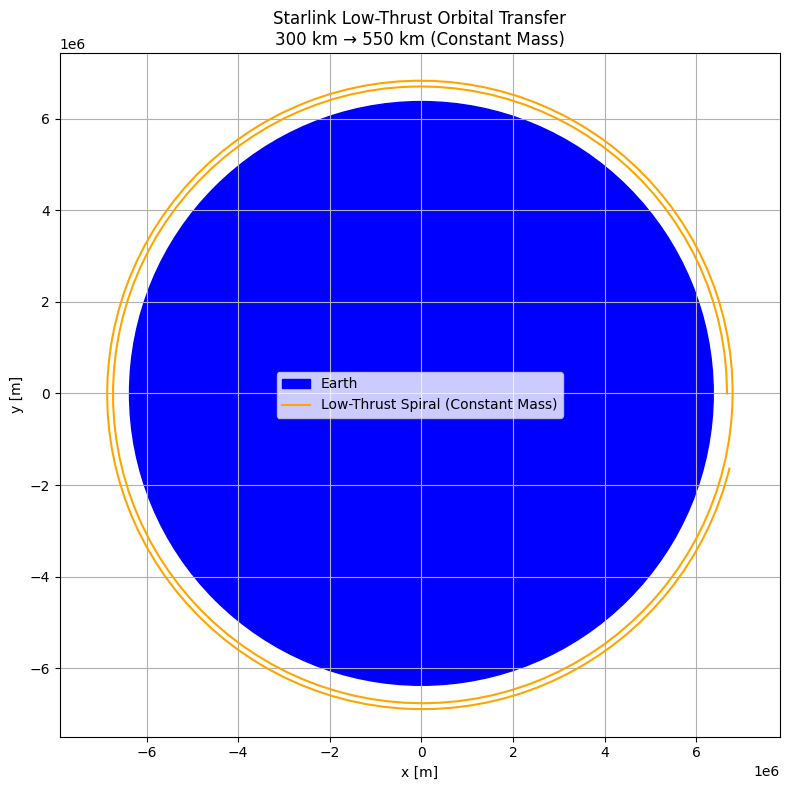

Final altitude: 550000.0 m
Time of flight: 10935 seconds (0.13 days)


In [4]:
'''
Mass change not incorperated in calculation.
Prupose is to verify a consant acceleration and correct implementation.
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# === Constants ===
MU = 3.986004418e14        # m^3/s^2, Earth's gravitational parameter
R_EARTH = 6371e3           # m, Earth's radius
G0 = 9.80665               # m/s^2

# === Example satallite specifications for visualization ===
m0 = 260                   # kg, constant mass
T = 6.7                    # N, constant thrust
Isp = 1700                 # s, specific impulse (irrelavent for this program, mass change ignored)

# === Orbital Altitudes ===
h1 = 300e3                # m, initial altitude
h2 = 550e3                 # m, final altitude
r1 = R_EARTH + h1
r2 = R_EARTH + h2

# === Initial velocity at r1 ===
v1 = np.sqrt(MU / r1)

# === Constant acceleration ===
a = T / m0

# === Define dr/dt using Edelbaum approximation ===
def dr_dt(t, r):
    v = np.sqrt(MU / r)
    return a * r / v  # dr/dt = a * r / v

# === Event to stop integration when r = r2 ===
def reach_r2(t, r):
    return r[0] - r2
reach_r2.terminal = True
reach_r2.direction = 1  # Trigger when r reaches r2

# === Integrate from r1 to r2 with event ===
t_span = (0, 1e7)  # Large enough to ensure reaching r2
sol = solve_ivp(dr_dt, t_span, [r1], dense_output=True, max_step=50, events=reach_r2)
r_vals = sol.sol(sol.t)[0]
tof = sol.t[-1]  # Actual time of flight from integration

# === Angular position θ(t) using dθ/dt ≈ v/r ===
theta = np.zeros_like(sol.t)
for i in range(1, len(sol.t)):
    dt = sol.t[i] - sol.t[i - 1]
    v = np.sqrt(MU / r_vals[i])
    theta[i] = theta[i - 1] + v / r_vals[i] * dt

# === Convert polar to Cartesian coordinates ===
x = r_vals * np.cos(theta)
y = r_vals * np.sin(theta)

# === Plot ===
plt.figure(figsize=(8, 8))
earth = plt.Circle((0, 0), R_EARTH, color='blue', label='Earth')
plt.gca().add_patch(earth)
plt.plot(x, y, color='orange', label='Low-Thrust Spiral (Constant Mass)')
plt.title("Starlink Low-Thrust Orbital Transfer\n300 km → 550 km (Constant Mass)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Verify final altitude ===
final_altitude = r_vals[-1] - R_EARTH
print(f"Final altitude: {final_altitude} m")
print(f"Time of flight: {tof:.0f} seconds ({tof/86400:.2f} days)")

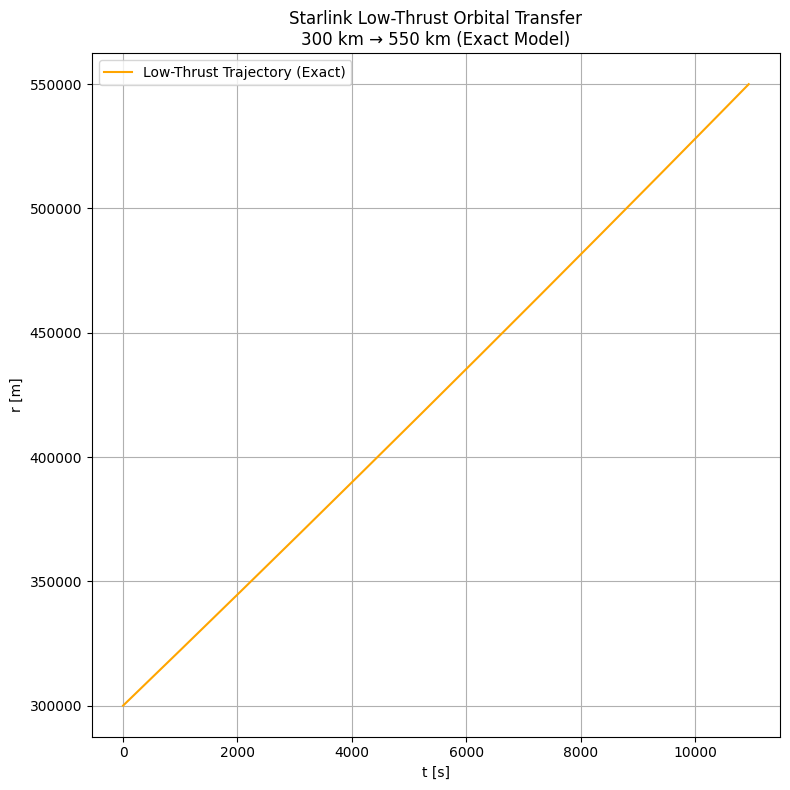

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(sol.t, r_vals-R_EARTH, color='orange', label='Low-Thrust Trajectory (Exact)')
plt.title("Starlink Low-Thrust Orbital Transfer\n300 km → 550 km (Exact Model)")
plt.xlabel("t [s]")
plt.ylabel("r [m]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

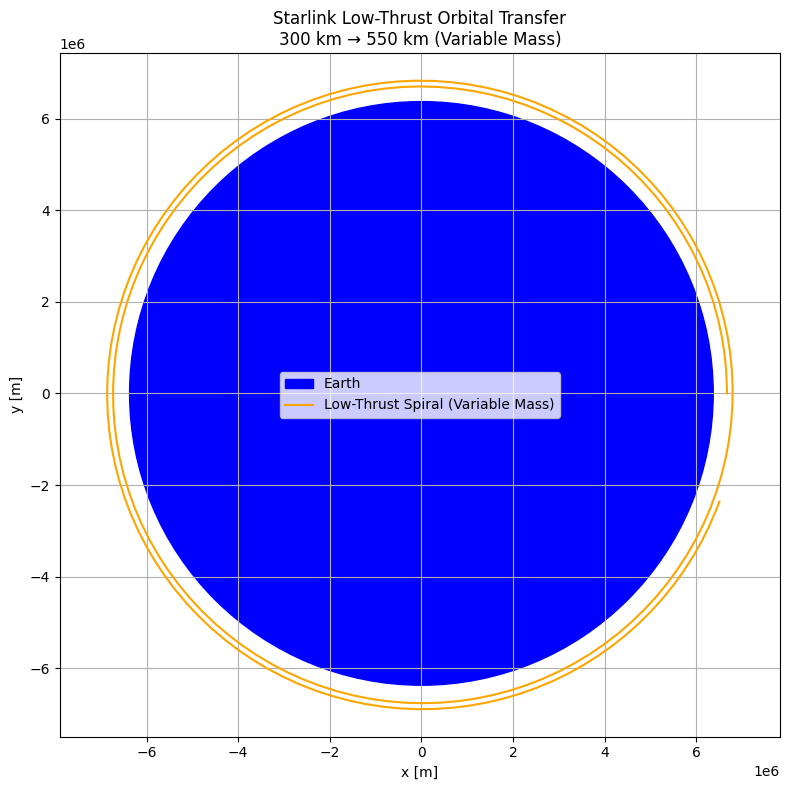

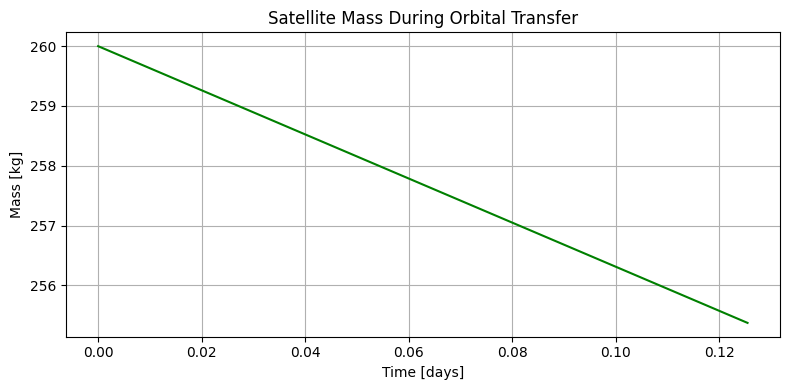

Final altitude: 550000 m
Time of flight: 10837 seconds (0.13 days)
Final mass: 255.37 kg
Propellant used: 4.63 kg


In [19]:
'''
Mass change incorperated with rocket equation.
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# === Constants ===
MU = 3.986004418e14        # m^3/s^2, Earth's gravitational parameter
R_EARTH = 6371e3           # m, Earth's radius
G0 = 9.80665               # m/s^2, standard gravity

# === Example satallite specifications for visualization ===
m0 = 260                   # kg, initial mass
T = 6.7                 # N, constant thrust (realistic value)
Isp = 1600                 # s, specific impulse
mdot = T / (Isp * G0)      # kg/s, mass flow rate (dm/dt = -T / (Isp * g0))

# === Orbital Altitudes ===
h1 = 300e3                 # m, initial altitude
h2 = 550e3                 # m, final altitude
r1 = R_EARTH + h1
r2 = R_EARTH + h2

# === Initial velocity at r1 ===
v1 = np.sqrt(MU / r1)

# === Define differential equations: dr/dt and dm/dt ===
def state_deriv(t, state):
    r, m = state
    v = np.sqrt(MU / r)
    a = T / m              # Acceleration, now varies with mass
    dr_dt = a * r / v      # dr/dt = a * r / v (Edelbaum approximation)
    dm_dt = -mdot          # dm/dt = -T / (Isp * g0)
    return [dr_dt, dm_dt]

# === Event to stop integration when r = r2 ===
def reach_r2(t, state):
    return state[0] - r2
reach_r2.terminal = True
reach_r2.direction = 1  # Trigger when r reaches r2

# === Integrate from r1 to r2 with event ===
t_span = (0, 1e8)  # Extended to account for lower thrust
sol = solve_ivp(state_deriv, t_span, [r1, m0], dense_output=True, max_step=50, events=reach_r2)
r_vals = sol.y[0]
m_vals = sol.y[1]
tof = sol.t[-1]  # Time of flight

# === Angular position θ(t) using dθ/dt ≈ v/r ===
theta = np.zeros_like(sol.t)
for i in range(1, len(sol.t)):
    dt = sol.t[i] - sol.t[i - 1]
    v = np.sqrt(MU / r_vals[i])
    theta[i] = theta[i - 1] + v / r_vals[i] * dt

# === Convert polar to Cartesian coordinates ===
x = r_vals * np.cos(theta)
y = r_vals * np.sin(theta)

# === Plot trajectory ===
plt.figure(figsize=(8, 8))
earth = plt.Circle((0, 0), R_EARTH, color='blue', label='Earth')
plt.gca().add_patch(earth)
plt.plot(x, y, color='orange', label='Low-Thrust Spiral (Variable Mass)')
plt.title("Starlink Low-Thrust Orbital Transfer\n300 km → 550 km (Variable Mass)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()

# === Plot mass over time ===
plt.figure(figsize=(8, 4))
plt.plot(sol.t / 86400, m_vals, color='green')
plt.title("Satellite Mass During Orbital Transfer")
plt.xlabel("Time [days]")
plt.ylabel("Mass [kg]")
plt.grid(True)
plt.tight_layout()

plt.show()

# === Verify results ===
final_altitude = r_vals[-1] - R_EARTH
final_mass = m_vals[-1]
propellant_used = m0 - final_mass
print(f"Final altitude: {final_altitude:.0f} m")
print(f"Time of flight: {tof:.0f} seconds ({tof/86400:.2f} days)")
print(f"Final mass: {final_mass:.2f} kg")
print(f"Propellant used: {propellant_used:.2f} kg")

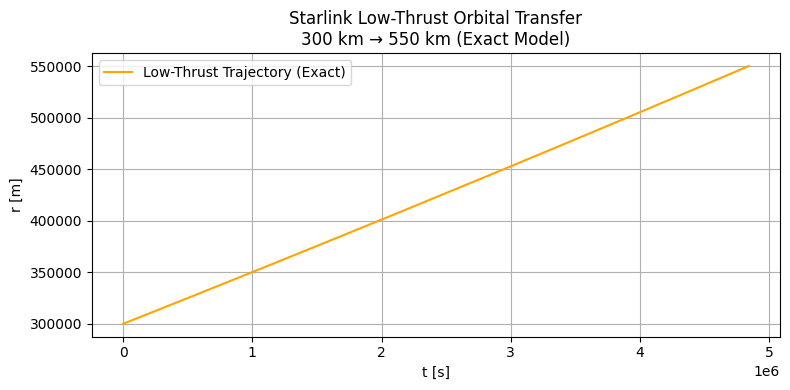

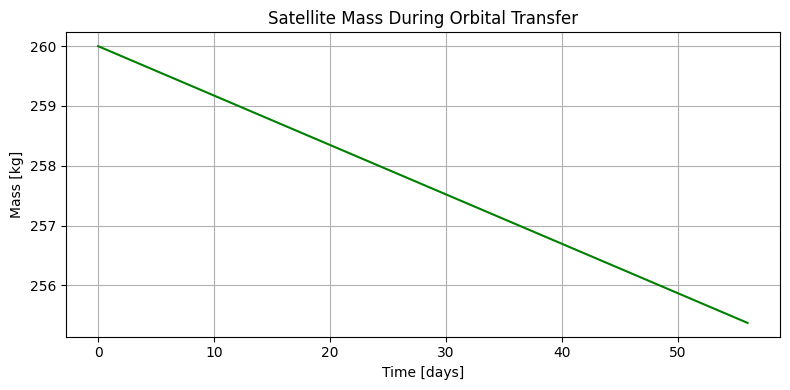

== Satallite Specifications ==
Initial mass: 260 kg
Thrust: 0.015 N
Specific Impulse: 1600 s
Mass flow rate: 9.56e-07 kg

== Orbit Transfer Analysis ==
Starting altitude: 300 km
Final altitude: 550 km
Time of flight: 4840708 seconds (56.03 days)
Final mass: 255.37 kg
Propellant used: 4.63 kg


In [29]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# === Constants ===
MU = 3.986004418e14        # m^3/s^2, Earth's gravitational parameter
R_EARTH = 6371e3           # m, Earth's radius
G0 = 9.80665               # m/s^2, standard gravity

# === Satellite Parameters (likely Starlink specifications, based on other satallites) ===
m0 = 260                   # kg, initial mass
T = 0.015                  # N, constant thrust (realistic value)
Isp = 1600                 # s, specific impulse
mdot = T / (Isp * G0)      # kg/s, mass flow rate (dm/dt = -T / (Isp * g0))

# === Orbital Altitudes ===
h1 = 300e3                 # m, initial altitude
h2 = 550e3                 # m, final altitude
r1 = R_EARTH + h1
r2 = R_EARTH + h2

# === Initial velocity at r1 ===
v1 = np.sqrt(MU / r1)

# === Define differential equations: dr/dt and dm/dt ===
def state_deriv(t, state):
    r, m = state
    v = np.sqrt(MU / r)
    a = T / m              # Acceleration, now varies with mass
    dr_dt = a * r / v      # dr/dt = a * r / v (Edelbaum approximation)
    dm_dt = -mdot          # dm/dt = -T / (Isp * g0)
    return [dr_dt, dm_dt]

# === Event to stop integration when r = r2 ===
def reach_r2(t, state):
    return state[0] - r2
reach_r2.terminal = True
reach_r2.direction = 1  # Trigger when r reaches r2

# === Integrate from r1 to r2 with event ===
t_span = (0, 1e8)  # Extended to account for lower thrust
sol = solve_ivp(state_deriv, t_span, [r1, m0], dense_output=True, max_step=200, events=reach_r2)
r_vals = sol.y[0]
m_vals = sol.y[1]
tof = sol.t[-1]  # Time of flight

# === Angular position θ(t) using dθ/dt ≈ v/r ===
theta = np.zeros_like(sol.t)
for i in range(1, len(sol.t)):
    dt = sol.t[i] - sol.t[i - 1]
    v = np.sqrt(MU / r_vals[i])
    theta[i] = theta[i - 1] + v / r_vals[i] * dt

# === Convert polar to Cartesian coordinates ===
x = r_vals * np.cos(theta)
y = r_vals * np.sin(theta)

# === Plot trajectory ===
plt.figure(figsize=(8, 4))
# earth = plt.Circle((0, 0), R_EARTH, color='blue', label='Earth')
# plt.gca().add_patch(earth)
plt.plot(sol.t, r_vals-R_EARTH, color='orange', label='Low-Thrust Trajectory (Exact)')
plt.title("Starlink Low-Thrust Orbital Transfer\n300 km → 550 km (Exact Model)")
plt.xlabel("t [s]")
plt.ylabel("r [m]")
#plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()

# === Plot mass over time ===
plt.figure(figsize=(8, 4))
plt.plot(sol.t / 86400, m_vals, color='green')
plt.title("Satellite Mass During Orbital Transfer")
plt.xlabel("Time [days]")
plt.ylabel("Mass [kg]")
plt.grid(True)
plt.tight_layout()

plt.show()

# === Verify results ===
final_altitude = r_vals[-1] - R_EARTH
final_mass = m_vals[-1]
propellant_used = m0 - final_mass
# Note values look very similar to

print("== Satallite Specifications ==")
print("Initial mass:", m0,"kg")
print("Thrust:", T,"N")
print("Specific Impulse:",Isp,"s")
print("Mass flow rate:", "{:.2e}".format(mdot),"kg")
print()

print("== Orbit Transfer Analysis ==")
print(f"Starting altitude: {(r_vals[0] - R_EARTH)/1000:.0f} km")
print(f"Final altitude: {final_altitude/1000:.0f} km")
print(f"Time of flight: {tof:.0f} seconds ({tof/86400:.2f} days)")
print(f"Final mass: {final_mass:.2f} kg")
print(f"Propellant used: {propellant_used:.2f} kg")